## Depression Analysis

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [234]:
df = pd.read_csv("depression.csv")
df.head(5)

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Depression Indicator
0,Crystal Brooks,64.0,Married,PhD,NaN,Non-smoker,Sedentary,Unemployed,23907,Low,Unhealthy,Fair,No,No,No,No,Yes
1,Roger Webster,77.0,Married,Bachelor's Degree,NaN,Non-smoker,Sedentary,Unemployed,21611,High,Unhealthy,Fair,No,No,No,Yes,Yes
2,Brian Smith,52.0,Married,High School,1.0,Non-smoker,Moderate,Employed,96626,Moderate,Unhealthy,Poor,No,Yes,Yes,No,No
3,Michelle Morrow,29.0,Single,Associate Degree,0.0,Non-smoker,Sedentary,Unemployed,36714,Low,Unhealthy,Poor,No,Yes,No,No,Yes
4,Erin Russell,NaN,Widowed,Master's Degree,3.0,Non-smoker,Sedentary,Unemployed,20825,High,Moderate,Poor,No,No,No,Yes,Yes


In [235]:
df.describe()

,Age,Number of Children,Income
count,523.000000,580.000000,599.000000
mean,48.910134,1.256897,65979.739566
std,17.678091,1.207863,44773.179395
min,18.000000,0.000000,15094.000000
25%,35.000000,0.000000,26085.500000
50%,49.000000,1.000000,38363.000000
75%,65.000000,2.000000,106639.500000
max,80.000000,4.000000,149959.000000


## Removing Irrelevant Columns

### Dropped 'Name' column from the dataset as it is unnecessary for analysis.

In [237]:
df = df.drop(["Name"], axis=1)
df.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Depression Indicator
0,64.0,Married,PhD,NaN,Non-smoker,Sedentary,Unemployed,23907,Low,Unhealthy,Fair,No,No,No,No,Yes
1,77.0,Married,Bachelor's Degree,NaN,Non-smoker,Sedentary,Unemployed,21611,High,Unhealthy,Fair,No,No,No,Yes,Yes
2,52.0,Married,High School,1.0,Non-smoker,Moderate,Employed,96626,Moderate,Unhealthy,Poor,No,Yes,Yes,No,No
3,29.0,Single,Associate Degree,0.0,Non-smoker,Sedentary,Unemployed,36714,Low,Unhealthy,Poor,No,Yes,No,No,Yes
4,NaN,Widowed,Master's Degree,3.0,Non-smoker,Sedentary,Unemployed,20825,High,Moderate,Poor,No,No,No,Yes,Yes


## Checking for any duplicate rows in dataset and removing them if there are any

In [239]:
print("Rows and Column in Dataset are : " , df.shape)

Rows and Column in Dataset are :  (599, 16)


In [240]:
duplicate = df[df.duplicated()]
print("Number of Duplicate rows : ", duplicate.shape)

Number of Duplicate rows :  (0, 16)


## Checking for Null values in Dataset and Removing it

In [242]:
print(df.isnull().sum())

Age                             76
Marital Status                   0
Education Level                  0
Number of Children              19
Smoking Status                   0
Physical Activity Level          0
Employment Status                0
Income                           0
Alcohol Consumption              0
Dietary Habits                   0
Sleep Patterns                   0
History of Mental Illness        0
History of Substance Abuse       0
Family History of Depression     0
Chronic Medical Conditions       0
Depression Indicator             0
dtype: int64


In [243]:
df = df.dropna()

In [244]:
print(df.isnull().sum())

Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
Depression Indicator            0
dtype: int64


## Performing Label Encoding

In [246]:
label_encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is non-numeric
        df[col] = label_encoder.fit_transform(df[col])

# Display the transformed dataframe
print("Updated Numeric DataFrame:")
print(df.head())

# Verify the data types
print("\nData Types after Encoding:")
print(df.dtypes)

Updated Numeric DataFrame:
    Age  Marital Status  Education Level  Number of Children  Smoking Status  \
2  52.0               1                2                 1.0               2   
3  29.0               2                0                 0.0               2   
5  55.0               1                0                 2.0               2   
6  41.0               0                2                 1.0               2   
7  52.0               3                0                 0.0               1   

   Physical Activity Level  Employment Status  Income  Alcohol Consumption  \
2                        1                  0   96626                    2   
3                        2                  1   36714                    1   
5                        1                  0   71104                    1   
6                        1                  1   25403                    1   
7                        1                  1   38281                    1   

   Dietary Habits  Slee

## Detecting Outliers in Dataset

<Axes: xlabel='Income'>

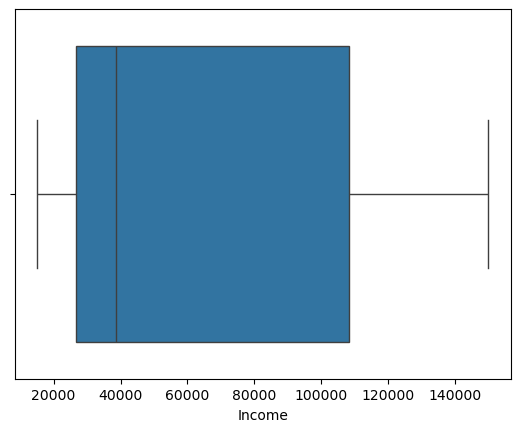

In [248]:
sns.boxplot(x=df['Income'])

### Interpretation: There are no outliers in 'Income' column.

In [250]:
df.shape # Number of rows before removing outliers

(507, 16)

In [251]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [252]:
for col in df.columns:
    if(col=="Age" or col=="Number of Children" or col=="Income"):
        df = remove_outliers(df, col)
        

### All outliers from all the columns has been removed.

In [254]:
df.shape  # Number of rows after removing outliers

(507, 16)

## Plotting the Dataset

### Histogram

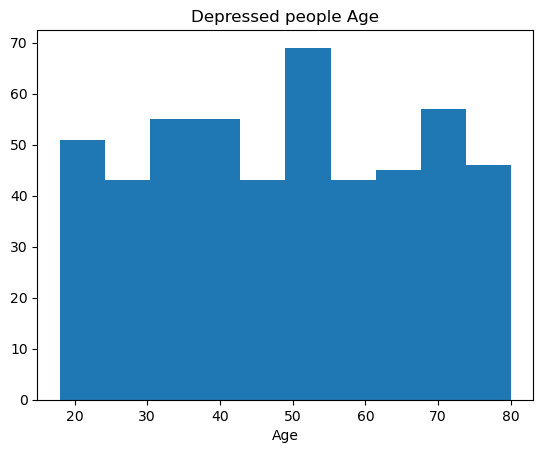

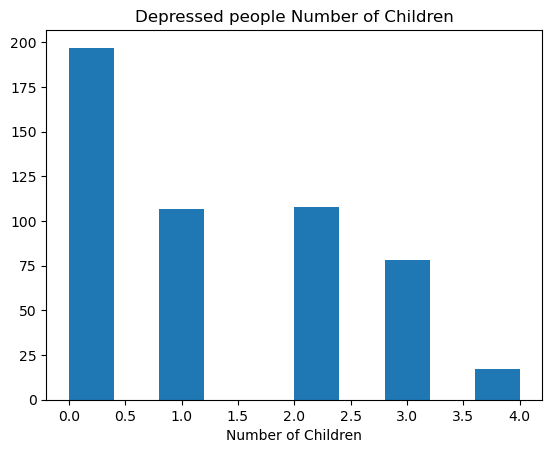

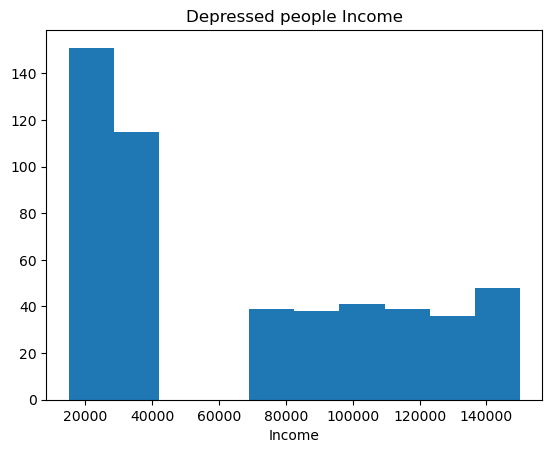

In [257]:
for i in df.columns:
    if df[i].dtype =='float64' or df[i].dtype =='int64':
        col = df[i]
        plt.xlabel(str(i))
        plt.title('Depressed people '+str(i))
        plt.hist(col)
        plt.show()

### Interpretation: The dataset shows that individuals aged 50 to 55 experience the highest prevalence of depression. This age group may require focused attention for mental health interventions.

### Heatmap


Correlation matrix:


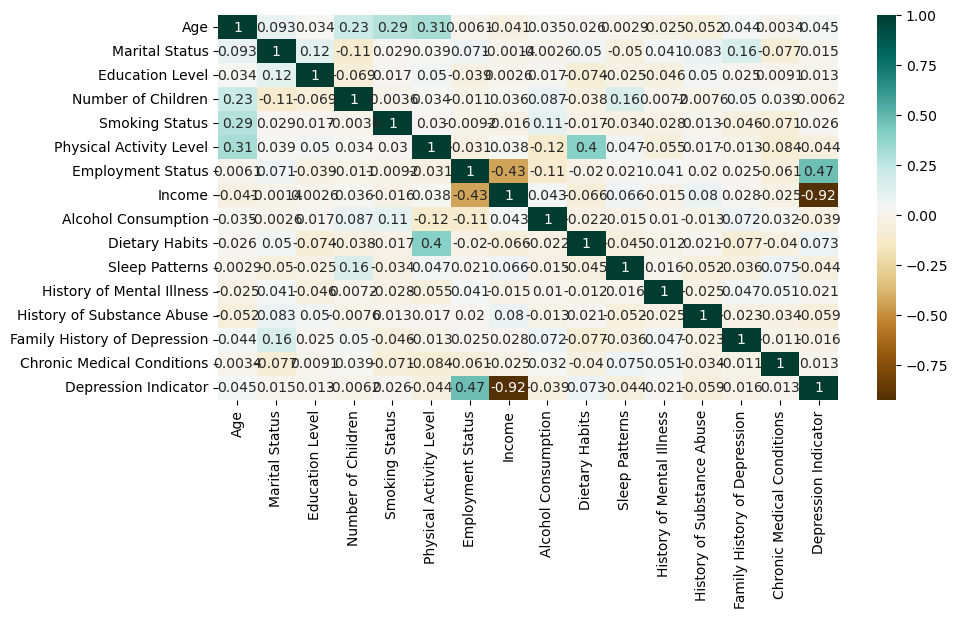

In [260]:
rows = df.iloc[:, :-1]
feature_names = rows.columns

print("\nCorrelation matrix:")
numeric_df = df.select_dtypes(include=['int32', 'int64', 'float64'])

plt.figure(figsize=(10, 5))
c = numeric_df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
plt.show()

### Interpretation: 

#### A strong negative correlation (-0.92) exists between income and the depression indicator, suggesting that individuals with higher income levels are significantly less likely to experience depression.

#### Employment status also shows a moderate positive correlation (0.47) with income, reinforcing the link between financial stability and mental well-being. Additionally, physical activity level correlates positively with both dietary habits (0.4) and employment status (0.4), indicating that employed individuals tend to engage in healthier lifestyles.

#### Smoking status has a weak positive correlation with age (0.29) and a negative correlation with the number of children (-0.23), implying that older individuals may have higher smoking rates, whereas those with more children are less likely to smoke.


## Performing Dummy Encoding

In [263]:
def dummy_encode(data, column):
    encoded_data = pd.get_dummies(data, columns=[column], drop_first=True)
    print(f"Dummy encoding applied to '{column}'. New columns created:\n{list(encoded_data.columns)}")
    return encoded_data

df_encoded = dummy_encode(df, 'Physical Activity Level')
df_encoded.head()

Dummy encoding applied to 'Physical Activity Level'. New columns created:
['Age', 'Marital Status', 'Education Level', 'Number of Children', 'Smoking Status', 'Employment Status', 'Income', 'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns', 'History of Mental Illness', 'History of Substance Abuse', 'Family History of Depression', 'Chronic Medical Conditions', 'Depression Indicator', 'Physical Activity Level_1', 'Physical Activity Level_2']


,Age,Marital Status,Education Level,Number of Children,Smoking Status,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Depression Indicator,Physical Activity Level_1,Physical Activity Level_2
2,52.0,1,2,1.0,2,0,96626,2,2,2,0,1,1,0,0,True,False
3,29.0,2,0,0.0,2,1,36714,1,2,2,0,1,0,0,1,False,True
5,55.0,1,0,2.0,2,0,71104,1,2,2,0,0,0,0,0,True,False
6,41.0,0,2,1.0,2,1,25403,1,2,1,0,0,1,1,1,True,False
7,52.0,3,0,0.0,1,1,38281,1,2,0,1,1,0,0,1,True,False


## Distribution of nominal variables using count plot

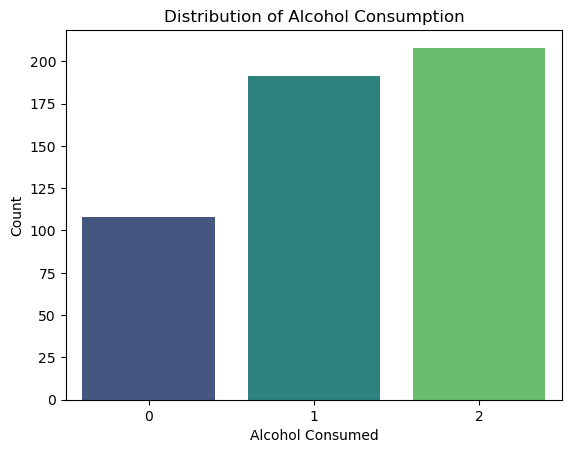

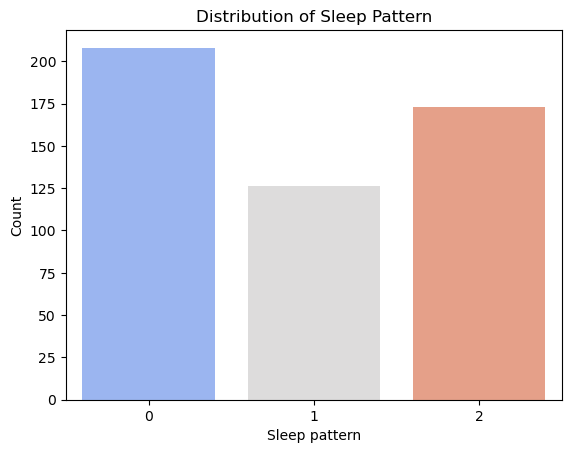

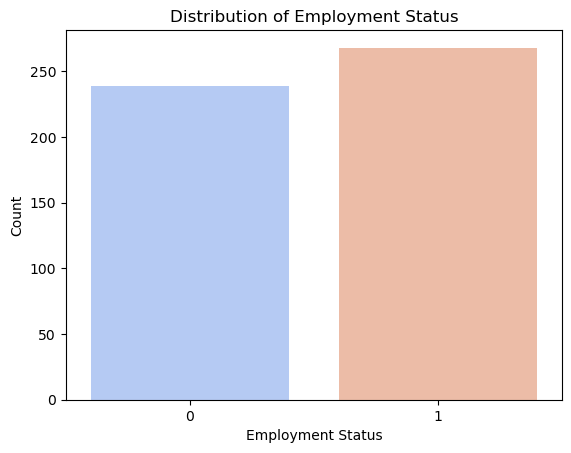

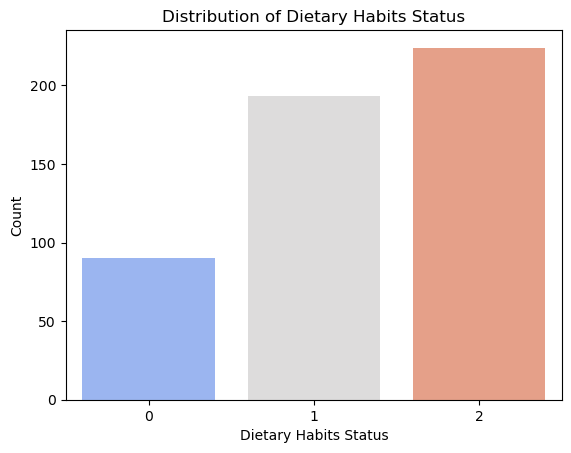

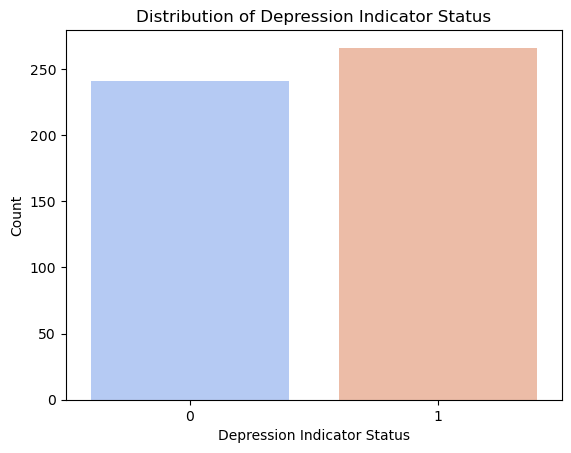

In [265]:
import warnings
warnings.filterwarnings('ignore')

sns.countplot(data=df, x='Alcohol Consumption', palette='viridis')
plt.title('Distribution of Alcohol Consumption')
plt.xlabel('Alcohol Consumed')
plt.ylabel('Count')
plt.show()
print()

sns.countplot(data=df, x='Sleep Patterns', palette='coolwarm')
plt.title('Distribution of Sleep Pattern')
plt.xlabel('Sleep pattern')
plt.ylabel('Count')
plt.show()

sns.countplot(data=df, x='Employment Status', palette='coolwarm')
plt.title('Distribution of Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.show()

sns.countplot(data=df, x='Dietary Habits', palette='coolwarm')
plt.title('Distribution of Dietary Habits Status')
plt.xlabel('Dietary Habits Status')
plt.ylabel('Count')
plt.show()

sns.countplot(data=df, x='Depression Indicator', palette='coolwarm')
plt.title('Distribution of Depression Indicator Status')
plt.xlabel('Depression Indicator Status')
plt.ylabel('Count')
plt.show()

### Scatter Plot

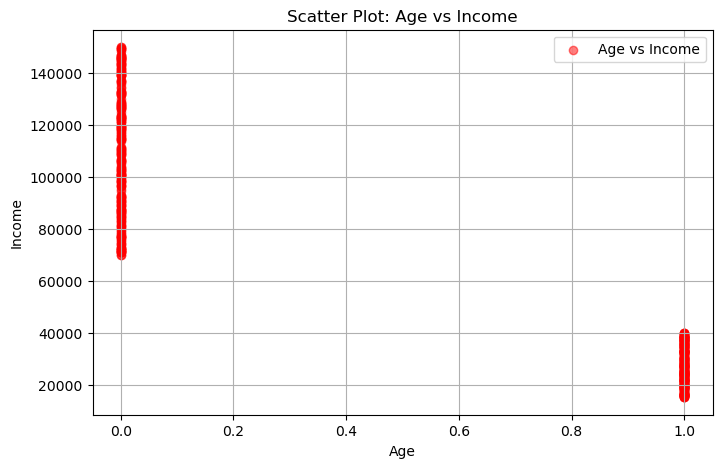

In [267]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Depression Indicator'], df['Income'], color='red', alpha=0.5, label='Age vs Income')
plt.title('Scatter Plot: Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid(True)
plt.legend()
plt.show()

### Interpretation: A strong negative correlation exists between income and the depression indicator, suggesting that individuals with higher income levels are significantly less likely to experience depression.¶

### Voilin Plot

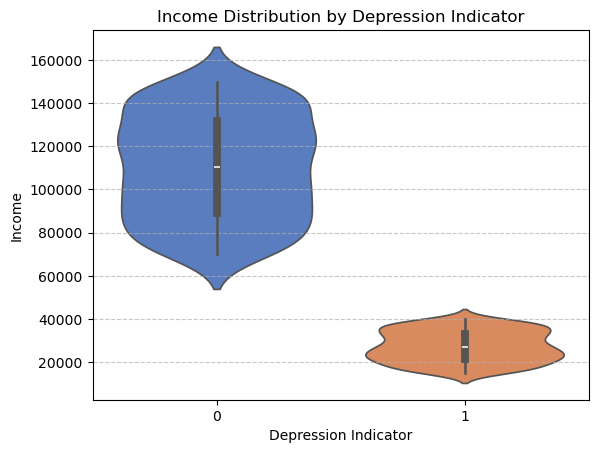

In [270]:
violin_data = df[['Income', 'Depression Indicator']].dropna()

sns.violinplot(x='Depression Indicator', y='Income', data=violin_data, palette='muted')

plt.title('Income Distribution by Depression Indicator')
plt.xlabel('Depression Indicator')
plt.ylabel('Income')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Interpretation : This violin plot shows income distribution differs between people with and without depression. Those without depression have a wider range of income, with higher median income. Those with depression have a narrower income range, suggesting potential financial challenges.

### Swarm Plot

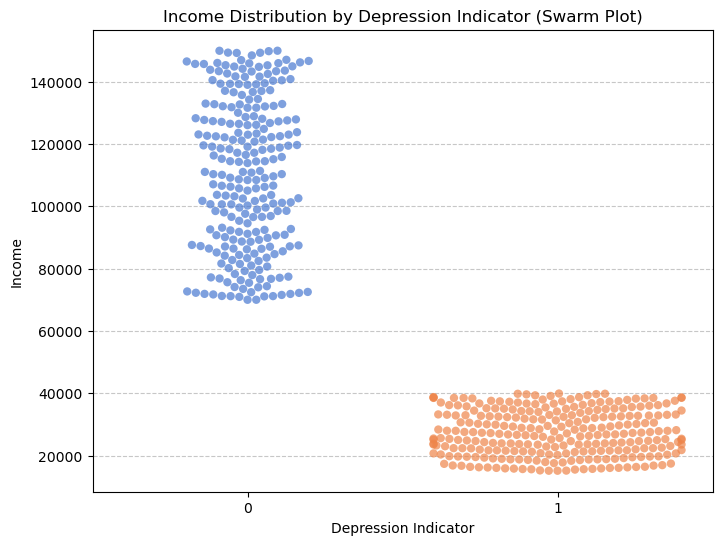

In [273]:
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Depression Indicator', y='Income', data=violin_data, palette='muted', size=6, alpha=0.7)

plt.title('Income Distribution by Depression Indicator (Swarm Plot)')
plt.xlabel('Depression Indicator')
plt.ylabel('Income')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Interpretation : This swarm plot shows a clear income difference between people with and without depression. Those without depression have a wider range of income, often higher, while those with depression have a narrower range, often lower.

## Determing Dependent and Independent Variables

In [276]:
X = df.drop('Depression Indicator', axis=1)
y = df['Depression Indicator']

## Split dataset into training set and test set

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

### 80% data is taken for training and 20% data for test

## Create Model Object

In [281]:
# Define parameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (150, 75)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001],
    'learning_rate_init': [0.001, 0.01],
    'batch_size': [32, 64]
}

base_mlp = MLPClassifier(
        max_iter=1000,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.2
    )

## Finding Optimal Parameters

In [283]:
print("\nPerforming Grid Search for Optimal Parameters...")
grid_search = GridSearchCV(
    base_mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Get best model
mlp = grid_search.best_estimator_
print("\nBest parameters:", grid_search.best_params_)


Performing Grid Search for Optimal Parameters...

Best parameters: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 32, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01}


### Interpretation: The neural network model, optimized with ReLU activation, a single hidden layer of 100 neurons, a learning rate of 0.01, and a batch size of 32, achieved an accuracy of 89%.

## Fitting the data onto the model and plotting graphs

In [285]:
def plot_learning_curve(estimator, X, y):
    """Plot learning curve to show model's performance with increasing data"""
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10))
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training score')
    plt.plot(train_sizes, test_mean, label='Cross-validation score')
    
    plt.fill_between(train_sizes, train_mean - train_std,
                     train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std,
                     test_mean + test_std, alpha=0.1)
    
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

def plot_confusion_matrix(y_true, y_pred, classes):
    """Plot confusion matrix with percentages"""
    cm = confusion_matrix(y_true, y_pred)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_percent, annot=True, fmt='.1f', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix (%)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

def plot_feature_importance(mlp, feature_names):
    """Plot feature importance based on neural network weights"""
    importance = np.abs(mlp.coefs_[0]).mean(axis=1)
    importance = importance / importance.sum()
    
    feat_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': importance
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x='importance', y='feature', data=feat_importance)
    plt.title('Feature Importance')
    plt.xlabel('Relative Importance')
    plt.tight_layout()
    plt.show()

## Make Predictions

In [287]:
y_pred = mlp.predict(X_test)

## Calculating Accuracy

In [289]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")


Model Accuracy: 0.8922


## Printing Classification Report and Confusion matrix


Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        54
           1       1.00      0.77      0.87        48

    accuracy                           0.89       102
   macro avg       0.92      0.89      0.89       102
weighted avg       0.91      0.89      0.89       102



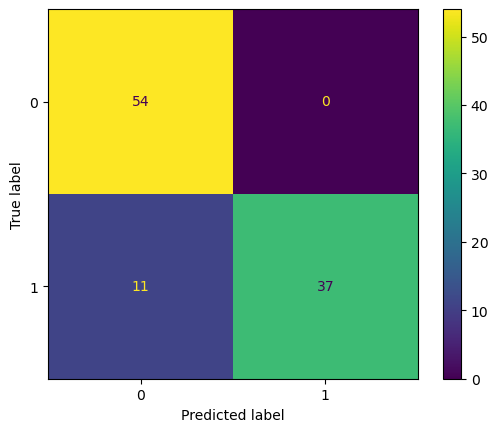

In [291]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### Interpretation : The precision for Class 0 was 83%, while its recall was 100%, indicating that all Class 0 instances were correctly classified. For Class 1, precision reached 100%, meaning all predicted Class 1 instances were correct, but recall was only 77%, with 11 false negatives. <br><br>This suggests the network struggles slightly with identifying all Class 1 cases, likely due to class imbalance or insufficient feature extraction. <br><br> To improve recall, techniques like class weight balancing, increasing hidden layers (e.g., 128, 64), adjusting the learning rate (e.g., 0.005), using dropout (0.2–0.3) can be applied.

## Plot Learning curves


Generating Learning Curve...


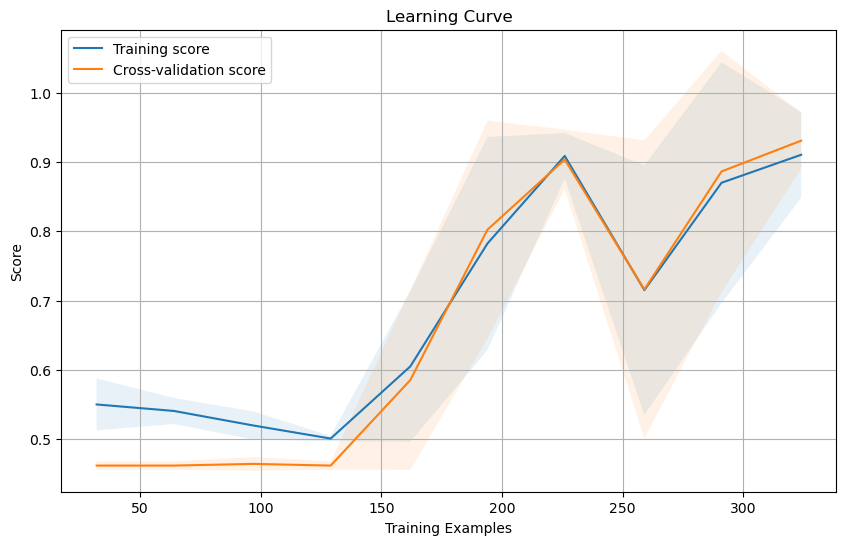

In [293]:
print("\nGenerating Learning Curve...")
plot_learning_curve(mlp, X_train, y_train) 

### Interpretation : The learning curve indicates that the model initially struggles with underfitting when trained on fewer than 150 examples, with both training and cross-validation scores remaining low (~0.5–0.6). <br><br> As the dataset size increases, performance improves significantly, reaching ~0.9 around 200 examples, suggesting the model is learning effectively. <br><br>However, a noticeable dip in the cross-validation score near 250 examples indicates a potential overfitting issue or noisy data. Beyond 300 examples, both scores stabilize above 0.9, showing that the model generalizes well with sufficient data.

## Plot feature importance


Analyzing Feature Importance...


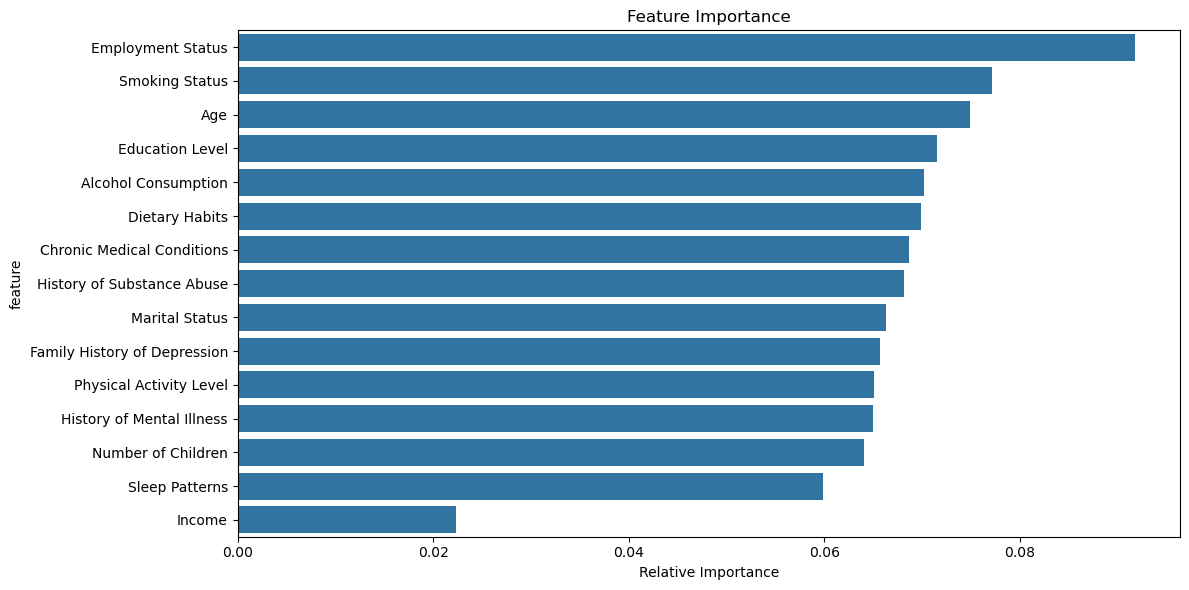

In [295]:
print("\nAnalyzing Feature Importance...")
plot_feature_importance(mlp, X_train.columns)

### Interpretation : The feature importance chart highlights the most influential factors in the model’s predictions. Employment Status is the most significant feature, suggesting that job stability plays a crucial role in the predicting Depression.<br><br> This ranking can help in feature selection, refining the model by focusing on the most impactful variables while potentially removing less relevant ones to improve efficiency and performance. 